In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
conc = pd.read_csv('../Data/Growth_data/ALE_data/ALE_conc.csv', index_col=0)

In [4]:
conc['Initial_ALE_mol']=conc['Initial_ALE']/conc['Mw']
conc['Final_ALE_mol']=conc['Final_ALE']/conc['Mw']
conc['FC']= conc['Final_ALE_mol']/conc['Initial_ALE_mol']

In [5]:
conc['percentage']=(conc['FC']-1)*100
conc['percentage']=conc['percentage'].astype(int)

In [6]:
for i in conc.index:
    conc.loc[i,'new_name']=i+" ("+str(conc.loc[i,'percentage'])+"%)"

In [7]:
conc=conc.rename(index=conc['new_name'])

In [8]:
conc.head()

,Unnamed: 1,Initial_ALE,Final_ALE,Isolate_screen,cross_tolerance,Mw,Initial_ALE_mol,Final_ALE_mol,FC,percentage,new_name
NaCl (66%),NaCl,30.0,50.0,NaN,NaN,58.440,0.513347,0.855578,1.666667,66,NaCl (66%)
12PD (59%),"1,2-Propanediol",52.0,83.0,83.0,62.0,76.090,0.683401,1.090814,1.596154,59,12PD (59%)
23BD (61%),23-Butanediol,49.0,79.0,69.0,59.0,90.121,0.543713,0.876599,1.612245,61,23BD (61%)
HDMA (89%),Hexamethylenediamine,20.0,38.0,38.0,32.0,116.210,0.172102,0.326994,1.900000,89,HDMA (89%)
PUTR (89%),Putrescine,20.0,38.0,38.0,32.0,88.150,0.226886,0.431083,1.900000,89,PUTR (89%)


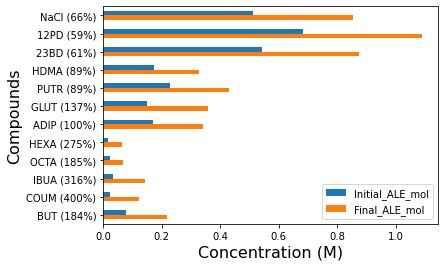

In [9]:
ax=conc[['Initial_ALE_mol','Final_ALE_mol']].plot.barh()
ax.invert_yaxis()
plt.xlabel("Concentration (M)", fontsize=16)
plt.ylabel("Compounds", fontsize=16)
plt.savefig("./../Plots/Figure_1c.svg")